In [1]:
import pandas as pd
from functools import reduce
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md

# File imports
## Adjen.. Matrix processing

In [2]:
adj_mat = pd.read_csv('../Griffin_data/Adjacency_Matrix_Output_Currency.csv', index_col='Unnamed: 0') #, index_col='Unnamed: 0'
adj_mat = adj_mat[['src', 'dst', 'date', 'cluster_src', 'neighbours', 'neighbours_cluster', 
                   'neighbours_!cluster', 'cluster_dst', 'twitter_query']]

adj_mat_ETH2 = adj_mat.loc[adj_mat['twitter_query'] == 'ETH2']
adj_mat_SHIB = adj_mat.loc[adj_mat['twitter_query'] == 'SHIB']
adj_mat_SOL = adj_mat.loc[adj_mat['twitter_query'] == 'SOL']
adj_mat_ETH = adj_mat.loc[adj_mat['twitter_query'] == 'ETH']
adj_mat_LINK = adj_mat.loc[adj_mat['twitter_query'] == 'LINK']
adj_mat_BTC = adj_mat.loc[adj_mat['twitter_query'] == 'BTC']
adj_mat_DOGE = adj_mat.loc[adj_mat['twitter_query'] == 'DOGE']

## News dataframe processing

In [3]:
news_df = pd.read_excel('../GPT-3_Approach/output_data_sentiment.xlsx', index_col='Unnamed: 0').drop(columns=['Unnamed: 0.1','Unnamed: 0.1.1'])

news_df['Query'] = news_df['Query'].str.replace('bitcoin', 'BTC')
news_df['Query'] = news_df['Query'].str.replace('ethereum2', 'ETH2')
news_df['Query'] = news_df['Query'].str.replace('shibainucoin', 'SHIB')
news_df['Query'] = news_df['Query'].str.replace('solana', 'SOL')
news_df['Query'] = news_df['Query'].str.replace('ethereum', 'ETH')
news_df['Query'] = news_df['Query'].str.replace('Chainlink', 'LINK')
news_df['Query'] = news_df['Query'].str.replace('dogecoin', 'DOGE')

news_df_BTC = news_df.loc[news_df['Query'] == 'BTC']
news_df_ETH2 = news_df.loc[news_df['Query'] == 'ETH2']
news_df_SHIB = news_df.loc[news_df['Query'] == 'SHIB']
news_df_SOL = news_df.loc[news_df['Query'] == 'SOL']
news_df_ETH = news_df.loc[news_df['Query'] == 'ETH']
news_df_LINK = news_df.loc[news_df['Query'] == 'LINK']
news_df_DOGE = news_df.loc[news_df['Query'] == 'DOGE']

## Crypto data import

In [4]:
df_ta_BTC = pd.read_csv('ta_df/df_ta_BTC.csv')
df_ta_SHIB = pd.read_csv('ta_df/df_ta_SHIB.csv')
df_ta_SOL = pd.read_csv('ta_df/df_ta_SOL.csv')
df_ta_ETH = pd.read_csv('ta_df/df_ta_ETH.csv')
df_ta_LINK = pd.read_csv('ta_df/df_ta_LINK.csv')
df_ta_DOGE = pd.read_csv('ta_df/df_ta_DOGE.csv')
df_ta_SHIB = pd.read_csv('ta_df/df_ta_SHIB.csv')

# Define Model
## Functions

In [5]:
adj_mat = adj_mat.loc[adj_mat['twitter_query'] == 'ETH']

In [6]:
adj_mat

,src,dst,date,cluster_src,neighbours,neighbours_cluster,neighbours_!cluster,cluster_dst,twitter_query
18,fastpeterson,leerzeit,2021-10-24,C7,1,1,0,C7,ETH
26,timmill52024962,leerzeit,2021-10-24,C7,1,1,0,C7,ETH
28,terry_twatter,leerzeit,2021-10-24,C7,1,1,0,C7,ETH
35,idesire_btc,leerzeit,2021-10-24,C7,2,2,0,C7,ETH
40,10cryptoes,leerzeit,2021-10-24,C7,4,4,0,C7,ETH
...,...,...,...,...,...,...,...,...,...
271638,bellbrand,babylionsclub,2021-12-26,C6,8,4,4,C6,ETH
271639,bellbrand,fat32_eth,2021-12-26,C6,8,4,4,C4,ETH
271640,bellbrand,fat32_eth,2021-12-26,C6,8,4,4,C4,ETH
271641,bellbrand,fat32_eth,2021-12-26,C6,8,4,4,C6,ETH


In [7]:
adj_mat['cluster_strength'] = adj_mat['neighbours_cluster'] / adj_mat['neighbours']

In [8]:
adj_mat.loc[(adj_mat['cluster_src'] == 'C7') & (adj_mat['date'] == '2021-10-24')]

,src,dst,date,cluster_src,neighbours,neighbours_cluster,neighbours_!cluster,cluster_dst,twitter_query,cluster_strength
18,fastpeterson,leerzeit,2021-10-24,C7,1,1,0,C7,ETH,1.000000
26,timmill52024962,leerzeit,2021-10-24,C7,1,1,0,C7,ETH,1.000000
28,terry_twatter,leerzeit,2021-10-24,C7,1,1,0,C7,ETH,1.000000
35,idesire_btc,leerzeit,2021-10-24,C7,2,2,0,C7,ETH,1.000000
40,10cryptoes,leerzeit,2021-10-24,C7,4,4,0,C7,ETH,1.000000
44,alexan20011,leerzeit,2021-10-24,C7,1,1,0,C7,ETH,1.000000
45,moonboyp,leerzeit,2021-10-24,C7,4,4,0,C7,ETH,1.000000
49,leerzeit,kennedypattiso1,2021-10-24,C7,183,173,10,C7,ETH,0.945355
53,leerzeit,10cryptoes,2021-10-24,C7,183,173,10,C7,ETH,0.945355
56,lucaxrp,leerzeit,2021-10-24,C7,1,1,0,C7,ETH,1.000000


In [142]:
adj_mat.loc[adj_mat['date'] == '2021-10-24']

,src,dst,date,cluster_src,neighbours,neighbours_cluster,neighbours_!cluster,cluster_dst,twitter_query,cluster_strength
18,fastpeterson,leerzeit,2021-10-24,C7,1,1,0,C7,ETH,1.000000
26,timmill52024962,leerzeit,2021-10-24,C7,1,1,0,C7,ETH,1.000000
28,terry_twatter,leerzeit,2021-10-24,C7,1,1,0,C7,ETH,1.000000
35,idesire_btc,leerzeit,2021-10-24,C7,2,2,0,C7,ETH,1.000000
40,10cryptoes,leerzeit,2021-10-24,C7,4,4,0,C7,ETH,1.000000
44,alexan20011,leerzeit,2021-10-24,C7,1,1,0,C7,ETH,1.000000
45,moonboyp,leerzeit,2021-10-24,C7,4,4,0,C7,ETH,1.000000
49,leerzeit,kennedypattiso1,2021-10-24,C7,183,173,10,C7,ETH,0.945355
53,leerzeit,10cryptoes,2021-10-24,C7,183,173,10,C7,ETH,0.945355
55,tadaspetra,developer_dao,2021-10-24,C6,1,1,0,C6,ETH,1.000000


In [172]:
ng = adj_mat.loc[adj_mat['date'] == '2021-10-24']

In [173]:
ng

,src,dst,date,cluster_src,neighbours,neighbours_cluster,neighbours_!cluster,cluster_dst,twitter_query,cluster_strength
18,fastpeterson,leerzeit,2021-10-24,C7,1,1,0,C7,ETH,1.000000
26,timmill52024962,leerzeit,2021-10-24,C7,1,1,0,C7,ETH,1.000000
28,terry_twatter,leerzeit,2021-10-24,C7,1,1,0,C7,ETH,1.000000
35,idesire_btc,leerzeit,2021-10-24,C7,2,2,0,C7,ETH,1.000000
40,10cryptoes,leerzeit,2021-10-24,C7,4,4,0,C7,ETH,1.000000
44,alexan20011,leerzeit,2021-10-24,C7,1,1,0,C7,ETH,1.000000
45,moonboyp,leerzeit,2021-10-24,C7,4,4,0,C7,ETH,1.000000
49,leerzeit,kennedypattiso1,2021-10-24,C7,183,173,10,C7,ETH,0.945355
53,leerzeit,10cryptoes,2021-10-24,C7,183,173,10,C7,ETH,0.945355
55,tadaspetra,developer_dao,2021-10-24,C6,1,1,0,C6,ETH,1.000000


In [9]:
test1 = adj_mat.loc[adj_mat['cluster_src'] == 'C6']
test2 = test1.loc[adj_mat['date'] == '2021-10-24']
test2['cluster_strength'].min()

#C7 2021-10-24 0.9453551912568307

1.0

In [219]:
#network graph per day

import plotly.graph_objects as go

import networkx as nx
import math


# MATPLOTLIB

In [313]:
#nodes = pd.DataFrame(list(zip(ng['src'], ng['dst'])), columns =['src','dst'])
#nodes


ng.loc[ng['cluster_src'] == 'C0', 'cluster_src'] = 0
ng.loc[ng['cluster_src'] == 'C1', 'cluster_src'] = 1
ng.loc[ng['cluster_src'] == 'C2', 'cluster_src'] = 2
ng.loc[ng['cluster_src'] == 'C3', 'cluster_src'] = 3
ng.loc[ng['cluster_src'] == 'C4', 'cluster_src'] = 4
ng.loc[ng['cluster_src'] == 'C5', 'cluster_src'] = 5
ng.loc[ng['cluster_src'] == 'C6', 'cluster_src'] = 6
ng.loc[ng['cluster_src'] == 'C7', 'cluster_src'] = 7
ng.loc[ng['cluster_src'] == 'C8', 'cluster_src'] = 8
ng.loc[ng['cluster_src'] == 'C9', 'cluster_src'] = 9

#ng.reset_index()

ng.set_index(ng['src'], inplace = True)

G = nx.Graph()
G = nx.convert_matrix.from_pandas_edgelist(ng,'src','dst')
pos = nx.spring_layout(G, k = 3/math.sqrt(len(ng)), iterations = 50)

#pos = nx.set_node_attributes(G, pos)

#node-attributes


#for i in G.nodes():
#    G.nodes[i]['cluster'] = ng.cluster_src[i]
    
#ng.cluster_src
#ng

#nx.set_node_attributes(G, pd.Series(nodes.gender, index=nodes.node).to_dict(), 'gender')

nx.set_node_attributes(G, pd.Series(ng.cluster_src, index=ng.src).to_dict(), 'cluster_src')

#G.nodes['tadaspetra']

#ng.src

#colors = [i/len(G.nodes) for i in range(len(G.nodes))]

#colors

#nx.draw(G, pos, node_color = nx.get_node_attributes(G,'cluster_src'), vmin = 0, vmax = 9, cmap = plt.cm.get_cmap('Accent'))

#pos = nx.complete_graph(G)

#G.add_edges_from(nodes)
#G.nodes

#network = nx.Graph(G)


In [314]:
G.nodes['leerzeit']

{'cluster_src': 7}

# PLOTLY

In [336]:
G = nx.Graph()
G = nx.convert_matrix.from_pandas_edgelist(ng,'src','dst')
pos = nx.spring_layout(G, k = 3/math.sqrt(len(ng)), iterations = 50)

pos

#nx.set_node_attributes(G, pd.Series(ng.cluster_src, index=ng.src).to_dict(), 'cluster_src')

nx.set_node_attributes(G, pos, 'pos')

G.nodes['fastpeterson']

{'pos': array([-0.08866998,  0.63247706])}

In [340]:
nx.set_node_attributes(G, pd.Series(ng.cluster_src, index=ng.src).to_dict(), 'cluster_src')
G.nodes['fastpeterson']

{'pos': array([-0.08866998,  0.63247706]), 'cluster_src': 7}

In [376]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo= 'text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color= node_cluster,
        size=10,
        colorbar=dict(
            thickness=15,
            title='Cluster_affiliation',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [368]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text
node_adjacencies

[1,
 17,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [344]:
G.nodes()

NodeView(('fastpeterson', 'leerzeit', 'timmill52024962', 'terry_twatter', 'idesire_btc', '10cryptoes', 'alexan20011', 'moonboyp', 'kennedypattiso1', 'tadaspetra', 'developer_dao', 'lucaxrp', 'githa_74', 'chesh_be_ra', 'estammaddoyom', 'ladtowsey', 'bitcoinduh', 'jayarsuaresz', 'rstormsf', 'lidofinance', 'neptune_xrp', 'theagentsmith_3', 'me09158228', 'cryptoskyreach', 'xrp_ninja', 'shibaxx1', 'sftd_art', 'ethanon21793186'))

In [404]:
node_cluster = ng.cluster_src
node_text = []

#G.nodes[edge[0]]['pos']

for i in G.nodes():
    node_text.append(str(i)+str(G.nodes[i].get('cluster_src')))

#node_trace.marker.color = node_cluster
#node_trace.text = node_text

print('fastpeterson' + str(G.nodes['fastpeterson'].get('cluster_src')))


#node_text
#node_cluster

fastpeterson7


In [379]:
fig = go.Figure(data=[edge_trace,node_trace],
             layout=go.Layout(
                title='<br>Cluster Affiliation on day x',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [190]:
def cluster_strength(adj_mat,query): #
    adj_mat = adj_mat.loc[adj_mat['twitter_query'] == query]

    adj_mat['cluster_strength'] = adj_mat['neighbours_cluster'] / adj_mat['neighbours']
    
    adj_mat['date'] = pd.to_datetime(adj_mat['date'])
    adj_mat_grouped = adj_mat.groupby([pd.Grouper(key='date', freq='D'),'cluster_src']).min()
    
    # cluster strength
    cs_day = adj_mat.groupby(['date'])['cluster_strength'].max()
    #cs_day = adj_mat.groupby(['date','cluster_src'])['cluster_strength'].max()
    cs_day = cs_day.to_frame()

    return cs_day

In [191]:
cluster_strength(adj_mat,'ETH')

C:\Users\jgier\AppData\Local\Temp/ipykernel_2412/1835133302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_mat['cluster_strength'] = adj_mat['neighbours_cluster'] / adj_mat['neighbours']
C:\Users\jgier\AppData\Local\Temp/ipykernel_2412/1835133302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_mat['date'] = pd.to_datetime(adj_mat['date'])


,cluster_strength
date,
2021-10-24,1.0
2021-10-25,1.0
2021-10-26,1.0
2021-10-27,1.0
2021-10-28,1.0
2021-10-29,1.0
2021-10-30,1.0
2021-10-31,1.0
2021-11-01,1.0


C:\Users\jgier\AppData\Local\Temp/ipykernel_2412/3169939108.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_mat['cluster_strength'] = adj_mat['neighbours_cluster'] / adj_mat['neighbours']
C:\Users\jgier\AppData\Local\Temp/ipykernel_2412/3169939108.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_mat['date'] = pd.to_datetime(adj_mat['date'])


<AxesSubplot:xlabel='date,cluster_src'>

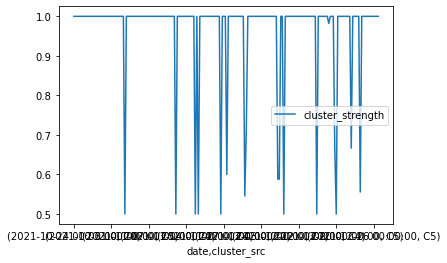

In [170]:
cluster_strength(adj_mat,'ETH').plot()

C:\Users\jgier\AppData\Local\Temp/ipykernel_2412/3169939108.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_mat['cluster_strength'] = adj_mat['neighbours_cluster'] / adj_mat['neighbours']
C:\Users\jgier\AppData\Local\Temp/ipykernel_2412/3169939108.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_mat['date'] = pd.to_datetime(adj_mat['date'])


array([[<AxesSubplot:title={'center':'cluster_strength'}>]], dtype=object)

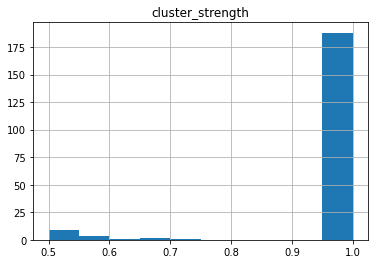

In [171]:
cluster_strength(adj_mat,'ETH').hist()

In [133]:
def merge_dataframe(df_ta, news_df, cs_day):
    df_ta = df_ta.rename(columns={'Date':'date'})


    df_ta['date'] = pd.to_datetime(df_ta['date'])
    news_df['date'] = pd.to_datetime(news_df['date'])
    cs_day = cs_day.reset_index()
    cs_day['date'] = pd.to_datetime(cs_day['date'])
    
    merge_1 = df_ta.merge(cs_day, on='date')
    merge_2 = merge_1.merge(news_df, on='date')
    merge_2
    
    merge_2.set_index('date', inplace=True)
    merge_2 = merge_2['2021-11-05':'2021-12-26']

    merged_cols = ['Close' ,'calculated_average', 'sentiment_bin', 'cluster_strength']
    df_final = merge_2[merged_cols]

    return df_final

In [134]:
def calculate_model(df_final):
    df = df_final.reset_index().copy()

    df = df[df.sentiment_bin != 'void']
    df = df[df.cluster_strength != 'void']

    df['calculated_average'] = pd.to_numeric(df['calculated_average'])
    df['sentiment_bin'] = pd.to_numeric(df['sentiment_bin'])
    df['cluster_strength'] = pd.to_numeric(df['cluster_strength'])

    # sum of scores
    df['x'] = df['sentiment_bin'] + df['calculated_average']

    # payoffs
    df['a'] = 0

    for index, row in df.iterrows():
        df.loc[index, 'a'] = 1 / (1 + math.exp( -(df.loc[index, 'x'])))

    df['b'] = 1 - df['a']

    # threshold
    df['q'] = df['b'] / (df['a'] + df['b'])

    df['1-q'] = 1 - df['q']

    df_result = df[['date', 'a', 'cluster_strength', 'Close']].set_index('date')
    
    return df_result

In [135]:
def plot_figure(df_result, query):
    X = df_result.index.values
    y_cluster_strength = df_result['cluster_strength']
    y_a = df_result['a']
    y_close = df_result['Close']
    
    fig, ax = plt.subplots(figsize=(14, 6))
    fig.subplots_adjust(right=0.75)

    twin2 = ax.twinx()

    p1, = ax.plot(X, y_cluster_strength, label = "Cluster Strength", linewidth=1.0, color="blue")
    p2, = ax.plot(X, y_a, label = "a", linewidth=1.0, color="red")
    p3, = twin2.plot(X, y_close, '--',label = "Currency close (USD)", linewidth=0.75, color="green")


    ax.set_xlabel("Date")
    twin2.set_ylabel("Currency Close (USD)")

    ax.yaxis.label.set_color(p1.get_color())
    twin2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=4, width=1.5)
    twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
    ax.tick_params(axis='x', **tkw)

    ax.legend(handles=[p1, p2, p3])
    ax.set_title(query)
    plt.savefig('figures/'+query+'.png')
    plt.show()

## Whole Model function

In [146]:
def model(adj_mat, df_ta, news_df, query):
    cs_day = cluster_strength(adj_mat, query)
    df_final = merge_dataframe(df_ta, news_df, cs_day)
    df_result = calculate_model(df_final)
    plot_figure(df_result, query)
    
    return df_result

# Loop

C:\Users\jgier\AppData\Local\Temp/ipykernel_2412/1559817952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['date'] = pd.to_datetime(news_df['date'])


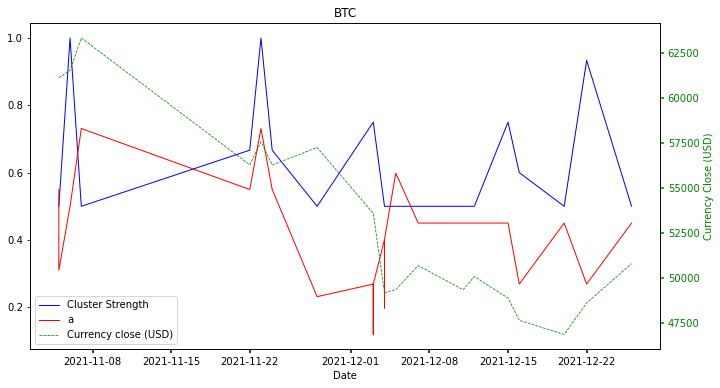

In [154]:
model_BTC = model(adj_mat=adj_mat_BTC, df_ta=df_ta_BTC, news_df=news_df_BTC, query='BTC')

C:\Users\jgier\AppData\Local\Temp/ipykernel_2412/1559817952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['date'] = pd.to_datetime(news_df['date'])


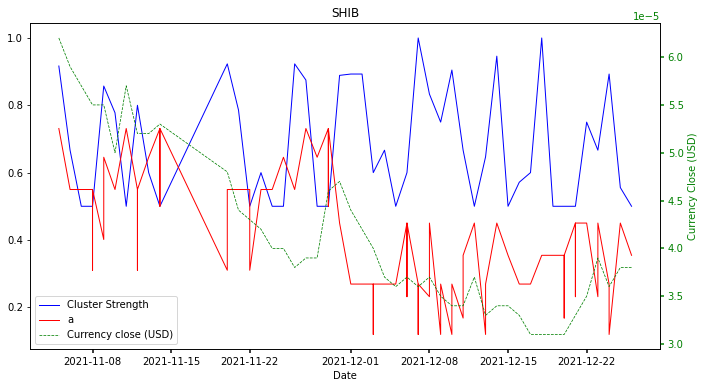

In [148]:
model_SHIB = model(adj_mat=adj_mat_SHIB, df_ta=df_ta_SHIB, news_df=news_df_SHIB, query='SHIB')

C:\Users\jgier\AppData\Local\Temp/ipykernel_2412/1559817952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['date'] = pd.to_datetime(news_df['date'])


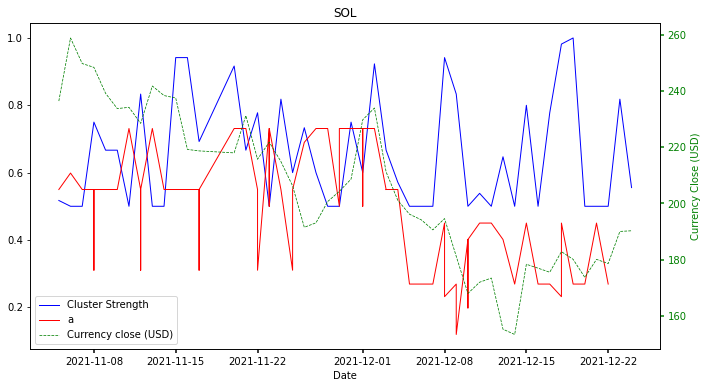

In [155]:
model_SOL = model(adj_mat=adj_mat_SOL, df_ta=df_ta_SOL, news_df=news_df_SOL, query='SOL')

C:\Users\jgier\AppData\Local\Temp/ipykernel_2412/1559817952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['date'] = pd.to_datetime(news_df['date'])


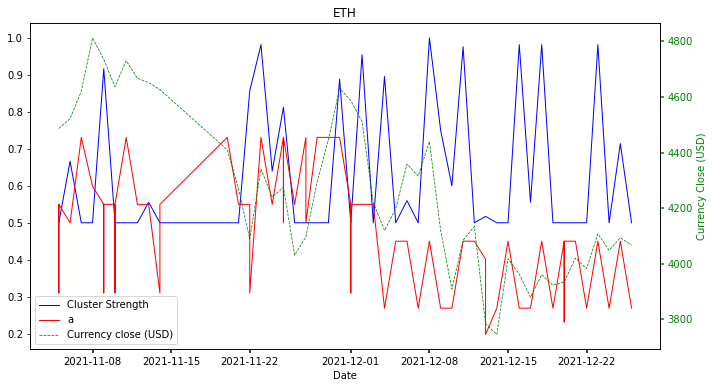

In [151]:
model_ETH = model(adj_mat=adj_mat_ETH, df_ta=df_ta_ETH, news_df=news_df_ETH, query='ETH')

C:\Users\jgier\AppData\Local\Temp/ipykernel_2412/1559817952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['date'] = pd.to_datetime(news_df['date'])


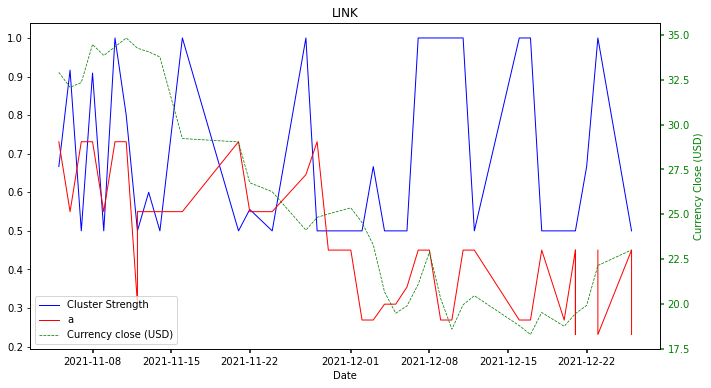

In [152]:
model_LINK = model(adj_mat=adj_mat_LINK, df_ta=df_ta_LINK, news_df=news_df_LINK, query='LINK')

C:\Users\jgier\AppData\Local\Temp/ipykernel_2412/1559817952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df['date'] = pd.to_datetime(news_df['date'])


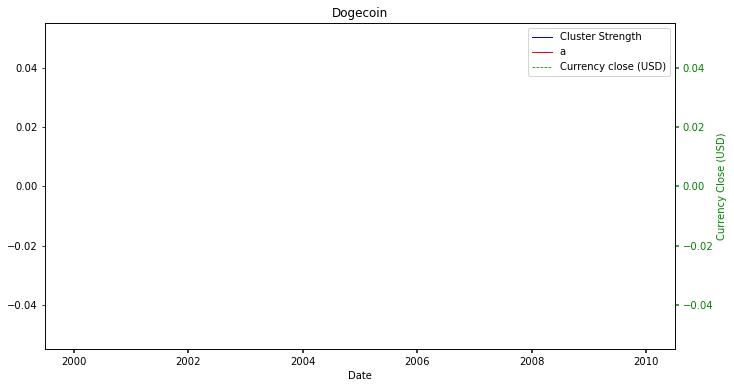

In [153]:
model_DOGE = model(adj_mat=adj_mat_DOGE, df_ta=df_ta_DOGE, news_df=news_df_DOGE, query='Dogecoin')

C:\Users\jgier\AppData\Local\Temp/ipykernel_2412/3520623250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_mat['cluster_strength'] = adj_mat['neighbours_cluster'] / adj_mat['neighbours']
C:\Users\jgier\AppData\Local\Temp/ipykernel_2412/3520623250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_mat['date'] = pd.to_datetime(adj_mat['date'])
C:\Users\jgier\AppData\Local\Temp/ipykernel_2412/1559817952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

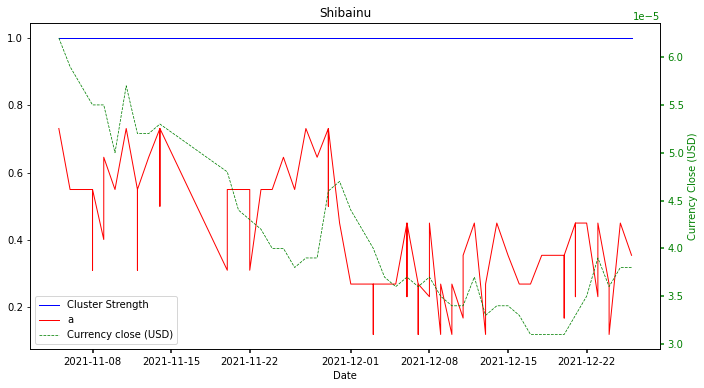

In [49]:
model_SHIB = model(adj_mat=adj_mat_SHIB, df_ta=df_ta_SHIB, news_df=news_df_SHIB, query='Shibainu')